Estimated coefficients:
b_0 = 1.2363636363636363 nb_1 = 1.1696969696969697


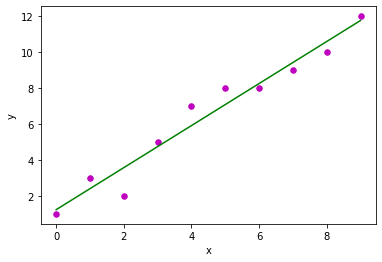

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

def estimate_coef(x, y): 
	# number of observations/points 
	n = np.size(x) 

	# mean of x and y vector 
	m_x, m_y = np.mean(x), np.mean(y) 

	# calculating cross-deviation and deviation about x 
	SS_xy = np.sum(y*x) - n*m_y*m_x 
	SS_xx = np.sum(x*x) - n*m_x*m_x 

	# calculating regression coefficients 
	b_1 = SS_xy / SS_xx 
	b_0 = m_y - b_1*m_x 

	return(b_0, b_1) 

def plot_regression_line(x, y, b): 
	# plotting the actual points as scatter plot 
	plt.scatter(x, y, color = "m", 
			marker = "o", s = 30) 

	# predicted response vector 
	y_pred = b[0] + b[1]*x 

	# plotting the regression line 
	plt.plot(x, y_pred, color = "g") 

	# putting labels 
	plt.xlabel('x') 
	plt.ylabel('y') 

	# function to show plot 
	plt.show() 

def main(): 
	# observations 
	x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
	y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]) 

	# estimating coefficients 
	b = estimate_coef(x, y) 
	print("Estimated coefficients:\nb_0 = {} nb_1 = {}".format(b[0], b[1])) 

	# plotting regression line 
	plot_regression_line(x, y, b) 

if __name__ == "__main__": 
	main() 


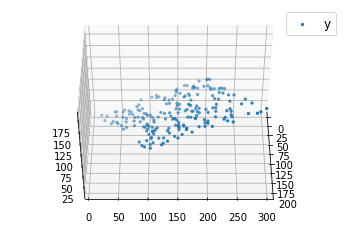

In [3]:
import numpy as np 
import matplotlib as mpl 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 

def generate_dataset(n): 
	x = [] 
	y = [] 
	random_x1 = np.random.rand() 
	random_x2 = np.random.rand() 
	for i in range(n): 
		x1 = i 
		x2 = i/2 + np.random.rand()*n 
		x.append([1, x1, x2]) 
		y.append(random_x1 * x1 + random_x2 * x2 + 1) 
	return np.array(x), np.array(y) 

x, y = generate_dataset(200) 

mpl.rcParams['legend.fontsize'] = 12

fig = plt.figure() 
ax = fig.gca(projection ='3d') 

ax.scatter(x[:, 1], x[:, 2], y, label ='y', s = 5) 
ax.legend() 
ax.view_init(45, 0) 

plt.show() 


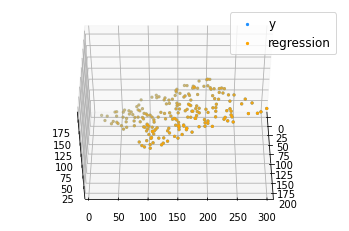

In [4]:
def mse(coef, x, y): 
	return np.mean((np.dot(x, coef) - y)**2)/2

def gradients(coef, x, y): 
	return np.mean(x.transpose()*(np.dot(x, coef) - y), axis = 1) 

def multilinear_regression(coef, x, y, lr, b1 = 0.9, b2 = 0.999, epsilon = 1e-8): 
	prev_error = 0
	m_coef = np.zeros(coef.shape) 
	v_coef = np.zeros(coef.shape) 
	moment_m_coef = np.zeros(coef.shape) 
	moment_v_coef = np.zeros(coef.shape) 
	t = 0

	while True: 
		error = mse(coef, x, y) 
		if abs(error - prev_error) <= epsilon: 
			break
		prev_error = error 
		grad = gradients(coef, x, y) 
		t += 1
		m_coef = b1 * m_coef + (1-b1)*grad 
		v_coef = b2 * v_coef + (1-b2)*grad**2
		moment_m_coef = m_coef / (1-b1**t) 
		moment_v_coef = v_coef / (1-b2**t) 

		delta = ((lr / moment_v_coef**0.5 + 1e-8) *
				(b1 * moment_m_coef + (1-b1)*grad/(1-b1**t))) 

		coef = np.subtract(coef, delta) 
	return coef 

coef = np.array([0, 0, 0]) 
c = multilinear_regression(coef, x, y, 1e-1) 
fig = plt.figure() 
ax = fig.gca(projection ='3d') 

ax.scatter(x[:, 1], x[:, 2], y, label ='y', 
				s = 5, color ="dodgerblue") 

ax.scatter(x[:, 1], x[:, 2], c[0] + c[1]*x[:, 1] + c[2]*x[:, 2], 
					label ='regression', s = 5, color ="orange") 

ax.view_init(45, 0) 
ax.legend() 
plt.show() 
